# Cluster de datos demográficos (Jerarquico aglomerativo) etiquetados con FCA

## Carga de los datos
Cargamos los datos y retocamos algún campo

In [53]:
import pandas as pd
import numpy as np 

In [54]:
Prado_users = pd.read_csv('../data/originales/Prado_users.csv')

Prado_users.replace('<12', '0-12', inplace=True)
Prado_users.replace('>70', '70+', inplace=True)
Prado_users.replace('Argenitina', 'Argentina', inplace=True)
Prado_users.replace('USA', 'United States', inplace=True)

users = Prado_users.copy()
users.head(5)

,userId,age,gender,country
0,1,55-64,male,Spain
1,2,25-34,female,Spain
2,3,18-24,female,Spain
3,4,18-24,female,Spain
4,5,35-44,male,Spain


## Propuesta de medidas de similitud para cada campo
- Para el campo de edad colocamos una distancia de uno entre cada rango de edad consecutivo
- Para el género utilizaremos 0 y 1 respectivamente
- Para el país utilizaremos el índice descrito en *Countries_distance.csv*

In [55]:
# Edad
age_index = 1
for age_range in users['age'].unique():
    users = users.replace(age_range, age_index)
    age_index += 1

# gender
users = users.replace('female', 0)
users = users.replace('male', 1)

# country
country_punctuation = pd.read_csv('../data/Countries_distance.csv')

for country in users['country'].unique():
    if country != 'Other':
        users = users.replace(country, country_punctuation.loc[country_punctuation['Country'] == country, 'Punctuation'].to_list()[0])

users = users.replace('Other', 70)
users

,userId,age,gender,country
0,1,1,1,81.738435
1,2,2,0,81.738435
2,3,3,0,81.738435
3,4,3,0,81.738435
4,5,4,1,81.738435
5,6,4,0,81.738435
6,7,5,0,81.738435
7,8,4,0,97.000000
8,9,6,1,81.738435
9,10,4,1,70.000000


In [56]:
# Quitamos la columna de género ya que es muy discriminatoria y para hacer los clusters de demograficos no es necesario
users.drop('gender', axis=1, inplace=True)

## Escalado de los datos

In [57]:
from sklearn.preprocessing import StandardScaler

scaled_users = users.copy()
scaled_users.drop('userId', axis=1, inplace=True)
#scaled_users.set_index('userId')

scaler = StandardScaler(with_mean=False, with_std=True)

scaled_users = pd.DataFrame(data=scaler.fit_transform(scaled_users), index=users['userId'], columns=['age', 'country'])

scaled_users

,age,country
userId,,
1,0.500137,8.238768
2,1.000274,8.238768
3,1.500411,8.238768
4,1.500411,8.238768
5,2.000547,8.238768
6,2.000547,8.238768
7,2.500684,8.238768
8,2.000547,9.777047
9,3.000821,8.238768


## Buscando el número óptimo de clusters
Aplicamos el algoritmo jerarquico aglomerativo con diferente número de clusters y evaluamos cual de ellos tiene el cociente *Davies–Bouldin* más bajo para utilizar ese número de conjuntos

In [58]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','w','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

In [59]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

Vamos a usar distintas estrategias de agrupamiento: ward, complete linkage, average linkage o single linkage.

In [60]:
# Pasamos los datos escalados a formato array para poder pintarlo
clusterarray = scaled_users.to_numpy()
#clusterarray[:,[1, 2]] = clusterarray[:,[2, 1]]

### Estrategia ward:
Ward minimiza la suma de diferencias cuadradas dentro de todos los grupos. Es un enfoque que minimiza la varianza y, en este sentido, es similar a la función objetivo de k-medias, pero se aborda con un enfoque jerárquico aglomerativo.


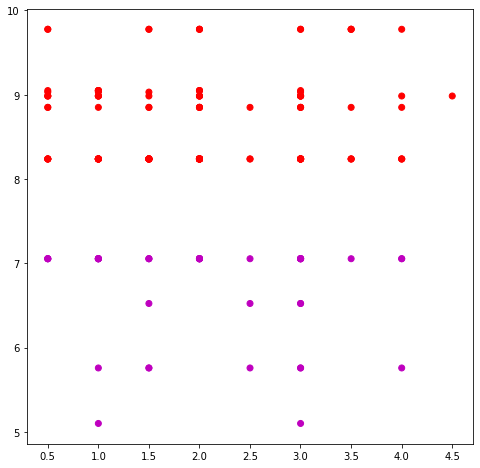

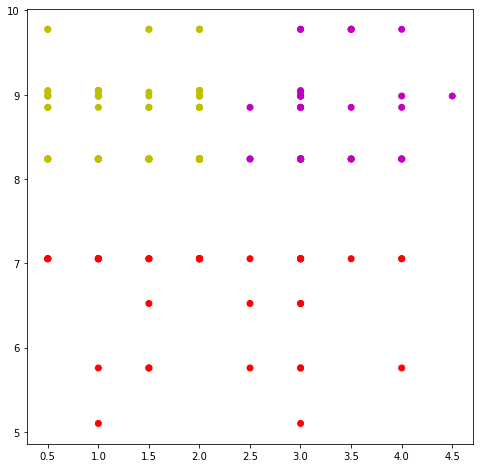

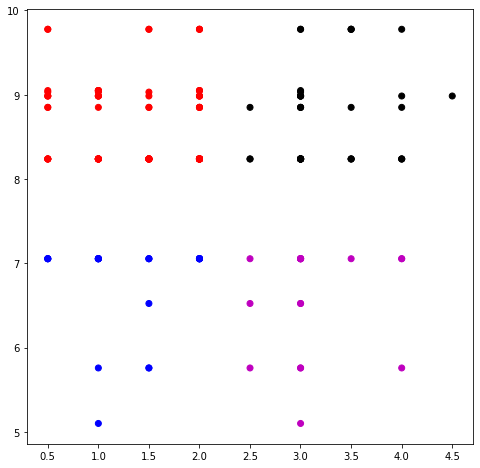

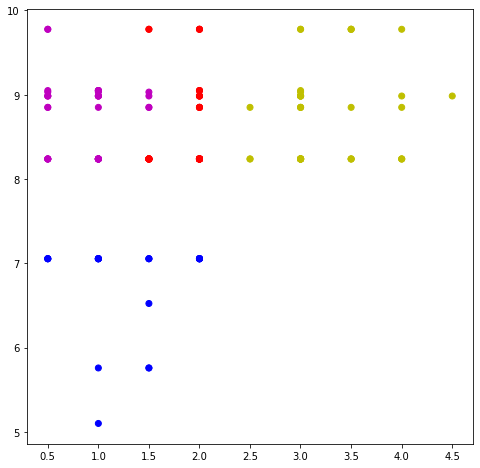

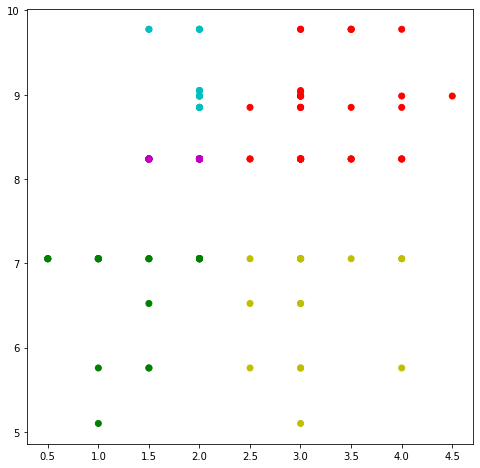

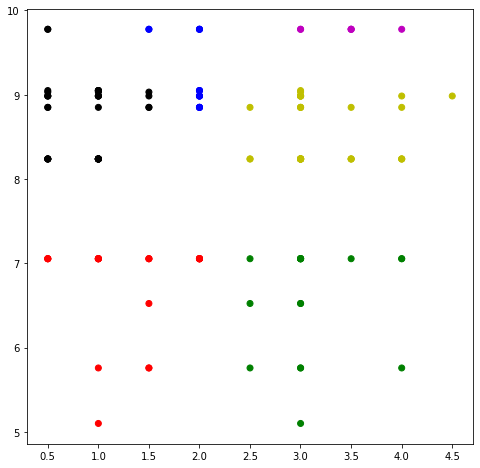

In [61]:
K_MAX = 8
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward', affinity='euclidean')
    ag.fit(scaled_users)
    plot_clusters(clusterarray, labels=ag.labels_)
    
    davies_boulding[k-2] = davies_bouldin_score(scaled_users, ag.labels_)

Numero ideal de clusters:  7
Puntuación mínima:  0.714758385532875


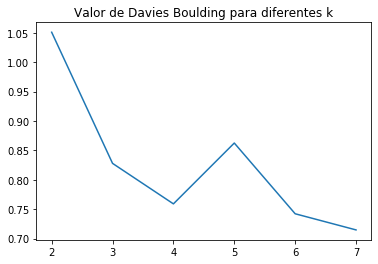

In [62]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')
print("Numero ideal de clusters: ", davies_boulding.argmin() + 2)
print("Puntuación mínima: ", davies_boulding[davies_boulding.argmin()])

### Maximum or complete linkage
El enlace máximo o completo minimiza la distancia máxima entre observaciones de pares de grupos.

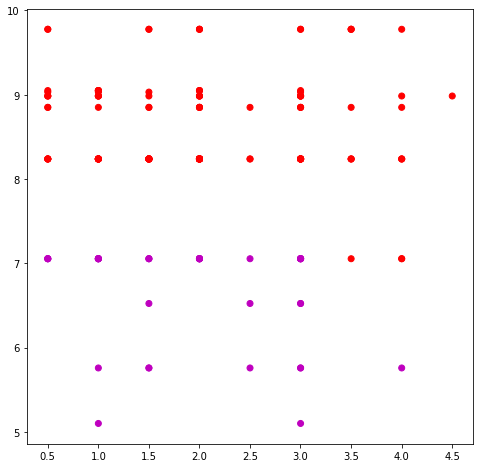

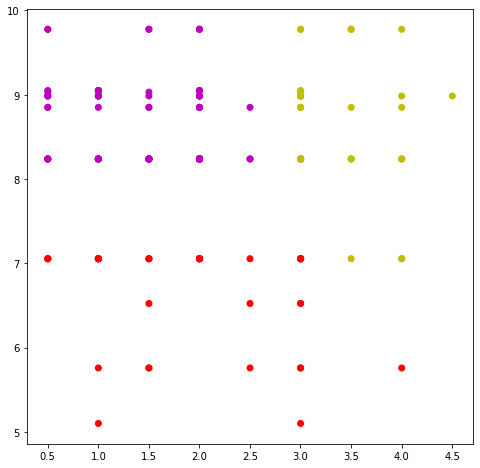

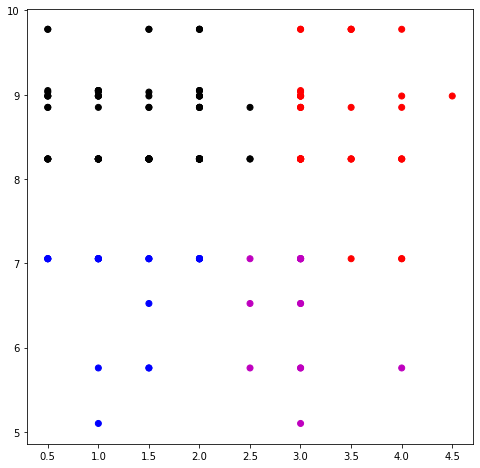

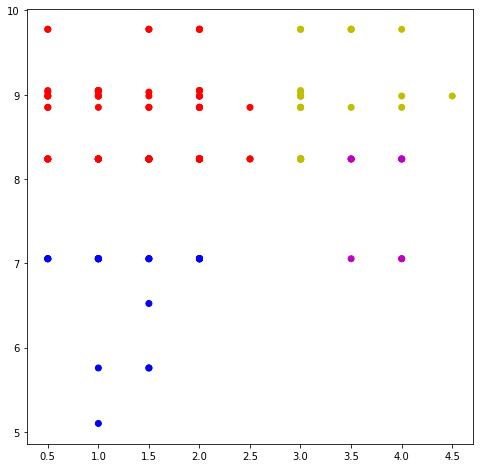

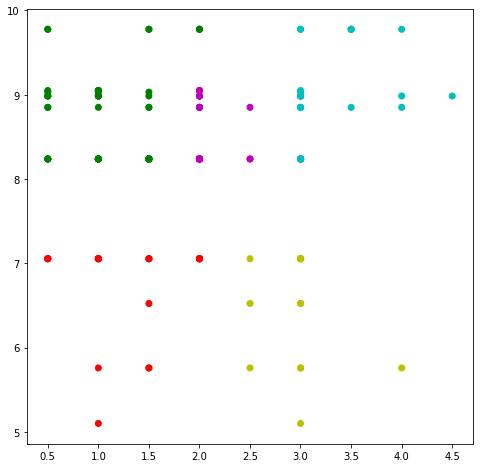

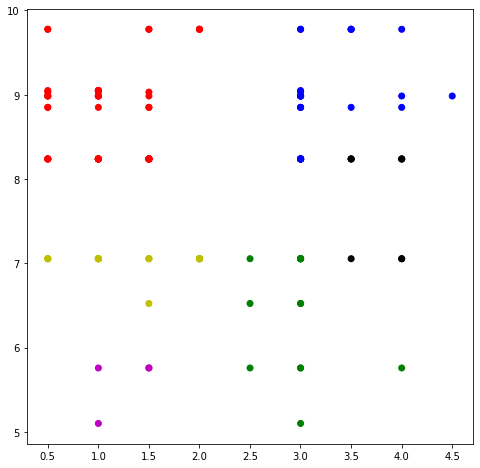

In [63]:
K_MAX = 8
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    ag = AgglomerativeClustering(n_clusters=k, linkage='complete', affinity='euclidean')
    ag.fit(scaled_users)
    plot_clusters(clusterarray, labels=ag.labels_)
    
    davies_boulding[k-2] = davies_bouldin_score(scaled_users, ag.labels_)

Numero ideal de clusters:  4
Puntuación mínima:  0.7816454940218586


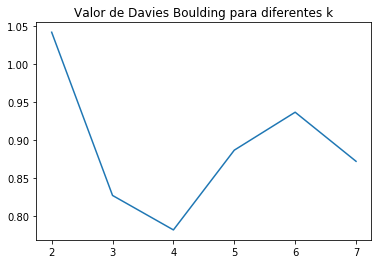

In [64]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')
print("Numero ideal de clusters: ", davies_boulding.argmin() + 2)
print("Puntuación mínima: ", davies_boulding[davies_boulding.argmin()])

### Average linkage
El vínculo promedio minimiza el promedio de las distancias entre todas las observaciones de pares de grupos.

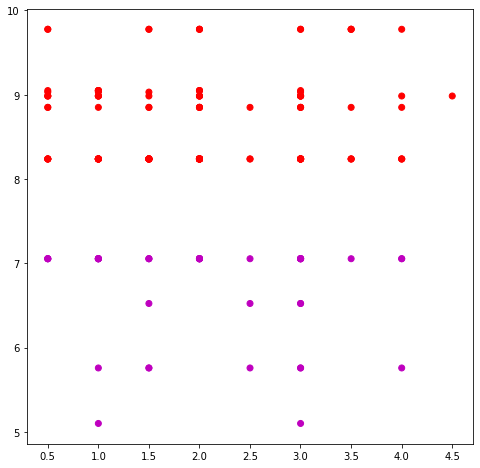

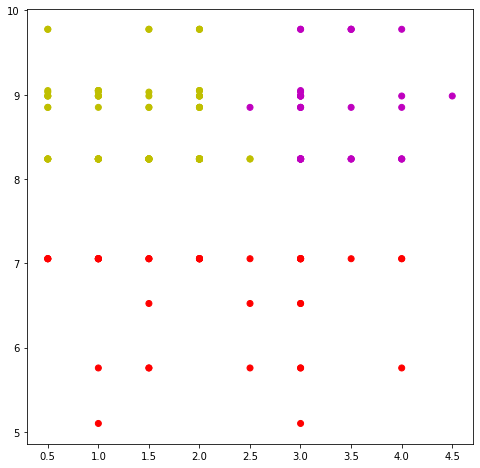

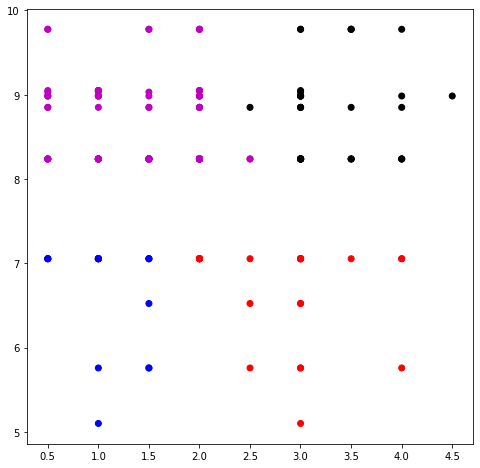

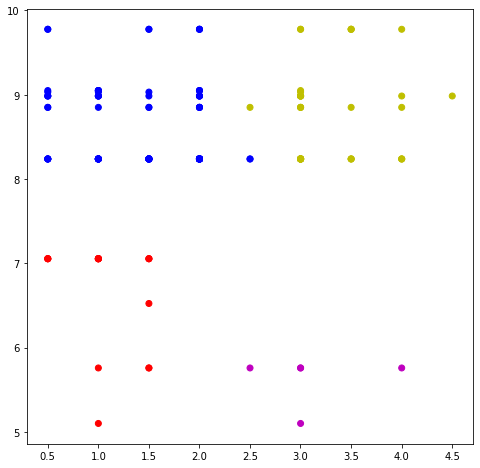

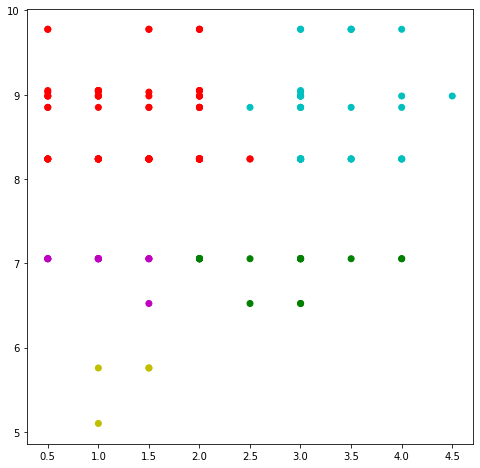

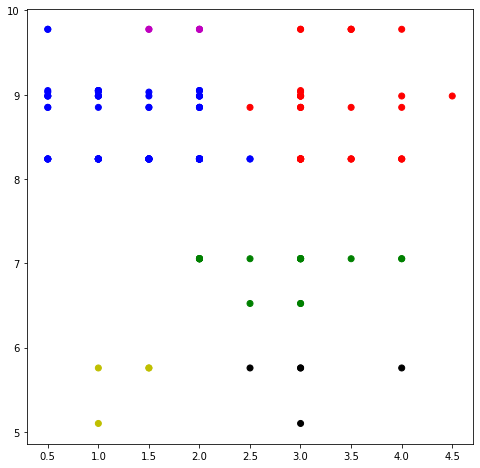

In [65]:
K_MAX = 8
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    ag = AgglomerativeClustering(n_clusters=k, linkage='average', affinity='euclidean')
    ag.fit(scaled_users)
    plot_clusters(clusterarray, labels=ag.labels_)
    
    davies_boulding[k-2] = davies_bouldin_score(scaled_users, ag.labels_)

Numero ideal de clusters:  7
Puntuación mínima:  0.6799386788151948


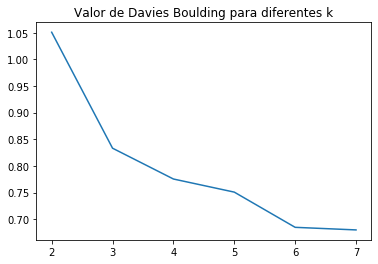

In [66]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')
print("Numero ideal de clusters: ", davies_boulding.argmin() + 2)
print("Puntuación mínima: ", davies_boulding[davies_boulding.argmin()])

### Single linkage
El enlace único minimiza la distancia entre las observaciones más cercanas de pares de grupos.

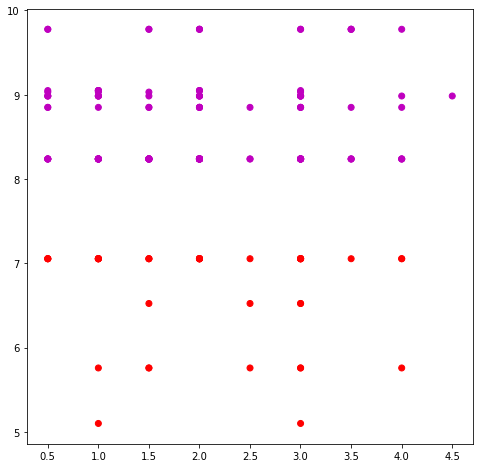

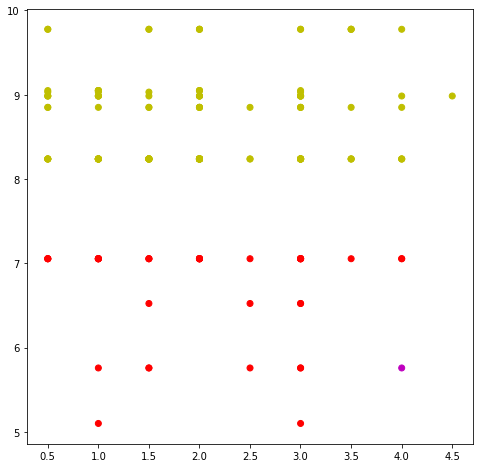

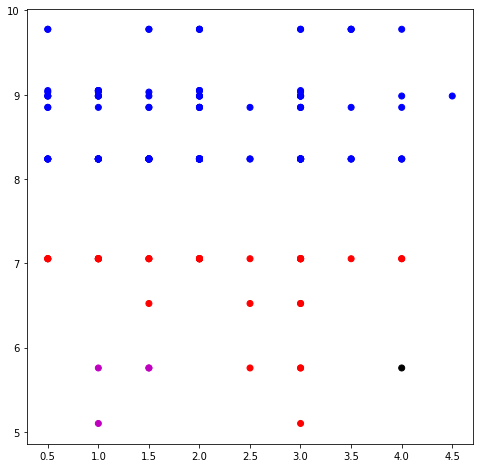

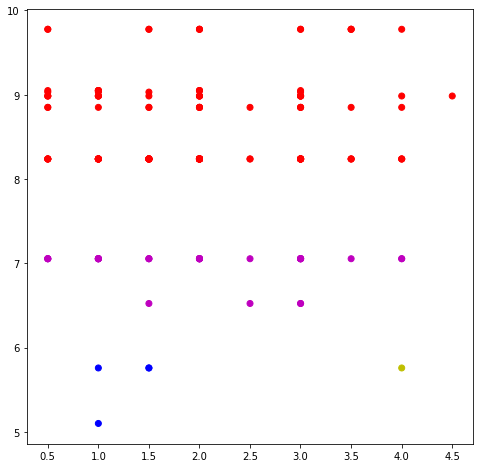

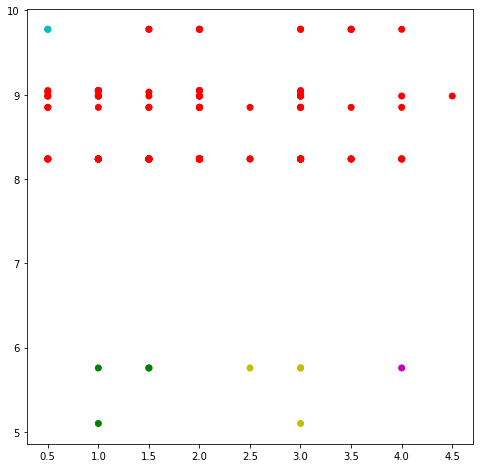

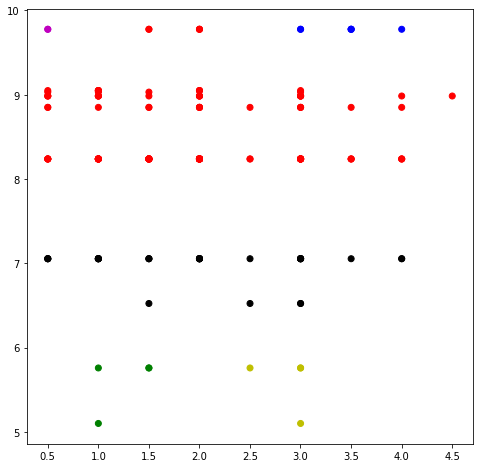

In [67]:
K_MAX = 8
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    ag = AgglomerativeClustering(n_clusters=k, linkage='single', affinity='euclidean')
    ag.fit(scaled_users)
    plot_clusters(clusterarray, labels=ag.labels_)
    
    davies_boulding[k-2] = davies_bouldin_score(scaled_users, ag.labels_)

Numero ideal de clusters:  7
Puntuación mínima:  0.7510926214234267


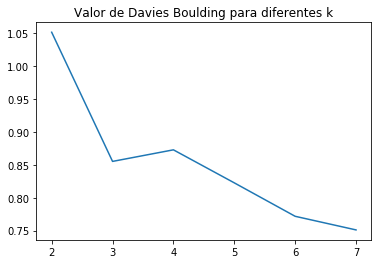

In [68]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')
print("Numero ideal de clusters: ", davies_boulding.argmin() + 2)
print("Puntuación mínima: ", davies_boulding[davies_boulding.argmin()])

#### Elegimos un número de cluster concreto y una estrategia concreta:
En concreto se el número de clusters y estrategia que tenga como resultado el menor de los valores de Davies Boulding:
ESTRATEGIA: Single linkage
Nº DE CLUSTERS: 6
PUNTUACIÓN MÍNIMA: 0.610569905490702

In [69]:
demograficosAglomerativo = AgglomerativeClustering(n_clusters=7, linkage='average', affinity='euclidean')
demograficosAglomerativo.fit(scaled_users)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=7,
                        pooling_func='deprecated')

### Pintamos un dendograma para ver como se va agrupando los clusters y su distancia

In [70]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

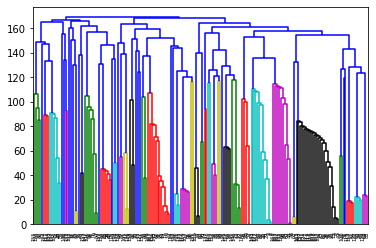

In [71]:
# Árbol completo
plot_dendrogram(demograficosAglomerativo)

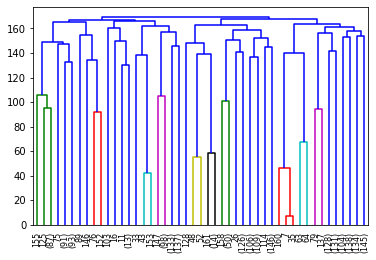

In [72]:
# Dibujamos los primeros 5 niveles del árbol para un mejor visualizado
levels = 5
plot_dendrogram(demograficosAglomerativo, p=levels, truncate_mode='level')

# Etiquetado de los clusters con FCA
Primero, vamos a recabar todos los datos en un nuevo DataFrame que incluya a que cluster pertenece cada usuario

In [73]:
clustered_users = Prado_users.copy()
clustered_users['cluster'] = demograficosAglomerativo.labels_
clustered_users.head(10)

,userId,age,gender,country,cluster
0,1,55-64,male,Spain,2
1,2,25-34,female,Spain,2
2,3,18-24,female,Spain,2
3,4,18-24,female,Spain,2
4,5,35-44,male,Spain,2
5,6,35-44,female,Spain,2
6,7,65-70,female,Spain,2
7,8,35-44,female,United States,6
8,9,45-54,male,Spain,0
9,10,35-44,male,Other,1


### *Convertimos las variables categóricas en otras de tipo binario*
Para poder generar un concept lattice hemos de partir de un conjunto de variables binarias. Para ello hemos de pasar de variables categóricas a variables binarias mediante funciones de pertenencia a cada posible valor de las mismas.

In [74]:
def categoricColumnsToBinary(df, columns=list()):
    for column in columns:
        for key in df[column].unique():
            df[key] = ''
            df.loc[df[column] == key, key] = 'X'

        df.drop([column], axis=1, inplace=True)

In [75]:
clustered_users_context = clustered_users.copy()

age = clustered_users_context['age'].unique()
age.sort()
age = age.reshape(3,3)
ageRanges = { 'young' : ["0-12", "13-17"],
              'youg-adult': ["18-24","25-34"],
              'adult' : ["35-44","45-54","55-64"],
              'senior' : ["65-70", "70+"]}

ranges = {}
for key in ageRanges:
    for i in ageRanges[key]:
        ranges[i] = key

for key in ranges:
    clustered_users_context.replace(key, ranges[key], inplace=True)

categoricColumnsToBinary(clustered_users_context, ['age', 'country', 'gender'])

clustered_users_context

,userId,cluster,adult,youg-adult,senior,young,Spain,United States,Other,Mexico,France,Japan,Brazil,Italy,Germany,Argentina,Canada,male,female
0,1,2,X,,,,X,,,,,,,,,,,X,
1,2,2,,X,,,X,,,,,,,,,,,,X
2,3,2,,X,,,X,,,,,,,,,,,,X
3,4,2,,X,,,X,,,,,,,,,,,,X
4,5,2,X,,,,X,,,,,,,,,,,X,
5,6,2,X,,,,X,,,,,,,,,,,,X
6,7,2,,,X,,X,,,,,,,,,,,,X
7,8,6,X,,,,,X,,,,,,,,,,,X
8,9,0,X,,,,X,,,,,,,,,,,X,
9,10,1,X,,,,,,X,,,,,,,,,X,


### *Creamos los retículos de cada cluster a partir del contexto formal anterior*

In [77]:
from concepts import Context

clusterLattices = list()

for c in clustered_users_context['cluster'].unique():
    # Separamos las filas que pertenecen al cluster
    clusterContext = clustered_users_context[clustered_users_context['cluster'] == c]
    clusterContext.drop(['cluster'], axis=1, inplace=True)
    # Generamos el retículo correspondiente al cluster
    clusterLattices.append(Context.fromstring(clusterContext.to_csv(index=False), frmat='csv'))

In [78]:
i = 0
for lattice in clusterLattices:
    print('\nCluster %i:' % (i))
    for extent, intent in lattice.lattice:
        if len(intent) == 3:
            print(intent, len(extent))
    i+=1


Cluster 0:
('youg-adult', 'Japan', 'male') 1
('adult', 'Germany', 'female') 1
('adult', 'Germany', 'male') 1
('youg-adult', 'Italy', 'female') 1
('adult', 'Japan', 'female') 1
('adult', 'United States', 'male') 1
('adult', 'Canada', 'female') 1
('adult', 'Italy', 'female') 1
('adult', 'United States', 'female') 1
('senior', 'Spain', 'female') 2
('youg-adult', 'Canada', 'male') 2
('youg-adult', 'Italy', 'male') 2
('adult', 'France', 'female') 2
('youg-adult', 'France', 'female') 2
('youg-adult', 'Japan', 'female') 3
('adult', 'France', 'male') 3
('youg-adult', 'France', 'male') 3
('adult', 'Japan', 'male') 3
('adult', 'Italy', 'male') 5
('youg-adult', 'Spain', 'female') 9
('youg-adult', 'Spain', 'male') 12
('adult', 'Spain', 'male') 13
('adult', 'Spain', 'female') 14

Cluster 1:
('adult', 'United States', 'male') 1
('adult', 'United States', 'female') 2
('youg-adult', 'United States', 'male') 2

Cluster 2:
('young', 'France', 'male') 1
('senior', 'Italy', 'male') 1
('senior', 'France',